In [1]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pwd

'/home/ubuntu/beast/code/DFSolution/alzheimer'

In [3]:
train_csv = pd.read_csv('/data/beast/df/alzheimer/train.csv')
val_csv = pd.read_csv('/data/beast/df/alzheimer/val.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe51e164828>,
      dtype=object)

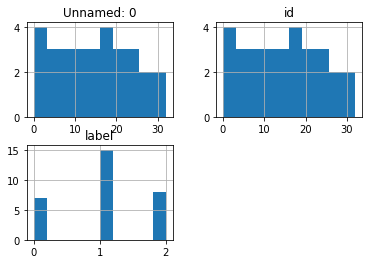

In [4]:
train_csv.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe51dd1e860>,
      dtype=object)

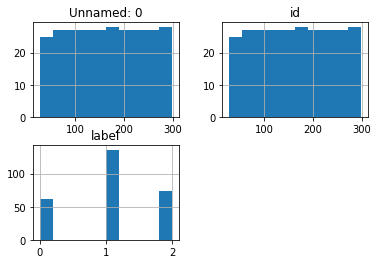

In [5]:
val_csv.hist()

In [6]:
t2_num = train_csv[train_csv['label']==2]['label'].count()
t1_num = train_csv[train_csv['label']==1]['label'].count()
t0_num = train_csv[train_csv['label']==0]['label'].count()
v2_num = val_csv[val_csv['label']==2]['label'].count()
v1_num = val_csv[val_csv['label']==1]['label'].count()
v0_num = val_csv[val_csv['label']==0]['label'].count()

In [7]:
print('train label 0 count:\t{}, percent:\t{:.3f}'.format(t0_num, t0_num/270))
print('train label 1 count:\t{}, percent:\t{:.3f}'.format(t1_num, t1_num/270))
print('train label 2 count:\t{}, percent:\t{:.3f}'.format(t2_num, t2_num/270))
print()
print('val label 0 count:\t{}, percent:\t{:.3f}'.format(v0_num, v0_num/30))
print('val label 1 count:\t{}, percent:\t{:.3f}'.format(v1_num, v1_num/30))
print('val label 2 count:\t{}, percent:\t{:.3f}'.format(v2_num, v2_num/30))

train label 0 count:	7, percent:	0.026
train label 1 count:	15, percent:	0.056
train label 2 count:	8, percent:	0.030

val label 0 count:	61, percent:	2.033
val label 1 count:	136, percent:	4.533
val label 2 count:	73, percent:	2.433


In [8]:
t2_num

8

In [9]:
all_csv = pd.read_csv('/data/beast/df/alzheimer/train_pre_label.csv')

In [10]:
a2_num = all_csv[all_csv['label']==2]['label'].count()
a1_num = all_csv[all_csv['label']==1]['label'].count()
a0_num = all_csv[all_csv['label']==0]['label'].count()
print('all label 0 count:\t{}, percent:\t{:.3f}'.format(a0_num, a0_num/300))
print('all label 1 count:\t{}, percent:\t{:.3f}'.format(a1_num, a1_num/300))
print('all label 2 count:\t{}, percent:\t{:.3f}'.format(a2_num, a2_num/300))

all label 0 count:	68, percent:	0.227
all label 1 count:	151, percent:	0.503
all label 2 count:	81, percent:	0.270


In [11]:
all_index0 = all_csv[all_csv['label']==0].index
all_index1 = all_csv[all_csv['label']==1].index
all_index2 = all_csv[all_csv['label']==2].index

In [12]:
# all_index0 = np.array(all_index0)
# all_index1 = np.array(all_index1)
# all_index2 = np.array(all_index2)

In [13]:
file = h5py.File('/data/beast/df/alzheimer/train_pre_data.h5')

In [14]:
list(all_index0[:2])

[1, 2]

In [15]:
len(all_csv.loc[all_index0])
all_csv.loc[all_index1]
a = pd.concat([all_csv.loc[all_index0], all_csv.loc[all_index1]])

In [16]:
val_index0 = all_index0[:7]
train_index0 = all_index0[7:]

val_index1 = all_index1[:15]
train_index1 = all_index1[15:]

val_index2 = all_index2[:8]
train_index2 = all_index2[8:]

# train_index = pd.concat([train_index0, train_index1, train_index2])
# val_index = pd.concat([val_index0, val_index1, val_index2])
train_index = train_index0.append(train_index1)
train_index = train_index.append(train_index2)
val_index = val_index0.append(val_index1)
val_index = val_index.append(val_index2)

train_index = train_index.sort_values()
val_index = val_index.sort_values()

train_csv = all_csv.loc[train_index]
val_csv = all_csv.loc[val_index]

In [17]:
train_index_np = np.array(train_index)
val_index_np = np.array(val_index)

In [18]:
train_csv.to_csv('/data/beast/df/alzheimer/train.csv')
val_csv.to_csv('/data/beast/df/alzheimer/val.csv')

In [24]:
train_hf = h5py.File('/data/beast/df/alzheimer/train.h5', 'w')
val_hf = h5py.File('/data/beast/df/alzheimer/val.h5', 'w')
train_hf.create_dataset('data', data=file['data'][list(train_index_np)])
val_hf.create_dataset('data', data=file['data'][list(val_index_np)])
train_hf.close()
val_hf.close()

In [20]:
train_index_np

array([ 27,  30,  31,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185,
       186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198,
       199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 21

In [25]:
# list(train_index_np)
# file['data'][list(train_index_np)]

In [ ]:
val_csv.sort

In [ ]:
val_index
val_csv.to_csv('/data/beast/df/alzheimer/train.csv')

In [26]:
pwd

'/home/ubuntu/beast/code/DFSolution/alzheimer'